# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.133077e+01     7.465212e+00
 * time: 0.0052449703216552734
     1     3.022829e+01     5.030857e+00
 * time: 0.015317916870117188
     2     1.681269e+01     3.718995e+00
 * time: 0.043931007385253906
     3     1.335509e+01     1.732109e+00
 * time: 0.06767392158508301
     4     1.196647e+01     1.561527e+00
 * time: 0.09139490127563477
     5     1.123721e+01     1.636514e+00
 * time: 0.11056303977966309
     6     1.097495e+01     2.644921e+00
 * time: 0.12960505485534668
     7     1.025270e+01     1.696659e+00
 * time: 0.14855599403381348
     8     9.627402e+00     1.039191e+00
 * time: 0.16762304306030273
     9     9.288386e+00     1.017767e+00
 * time: 0.18667984008789062
    10     9.077258e+00     7.136464e-01
 * time: 0.20604991912841797
    11     9.057894e+00     1.424204e+00
 * time: 0.2203679084777832
    12     8.912289e+00     7.066500e-01
 * time: 0.23462891578674316
    13     8.772177e+00     4.701831e-01
 * ti

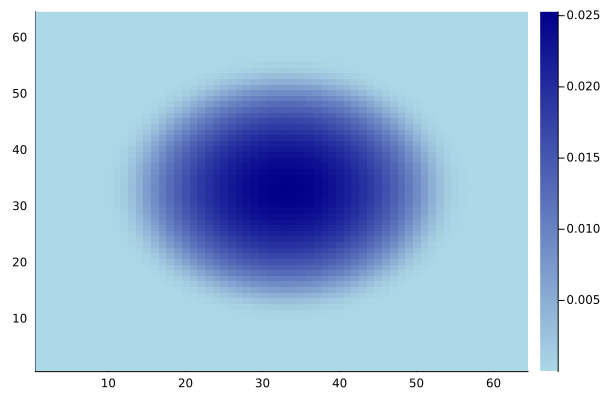

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)